In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
#!pip install tensorflow
import tensorflow as tf
%matplotlib inline
import torch
from tensorflow import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA UNZIPING**


In [ ]:
!unzip /content/drive/MyDrive/08-11-21-semantic-clustering/dataset.zip -d /content/drive/MyDrive/08-11-21-semantic-clustering/Data

Archive:  /content/drive/MyDrive/08-11-21-semantic-clustering/dataset.zip
replace /content/drive/MyDrive/08-11-21-semantic-clustering/Data/dataset/SemEval2010_task8_scorer-v1.2/answer_key1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#put the base url/path of your directory here.

baseurl='/content/drive/MyDrive/08-11-21-semantic-clustering/Data/dataset' # base url of your directory

# **DATA PREPROCESSING**







In [ ]:
#importing the training data set
with open(baseurl+'/SemEval2010_task8_training/TRAIN_FILE.TXT') as f:
  list_1 = list(f)[::4]

In [ ]:
with open(baseurl+'/SemEval2010_task8_training/TRAIN_FILE.TXT') as f:
  list_2 = list(f)[1::4]

In [ ]:
#converting sentences into dataframe

df = pd.DataFrame (list_1, columns = ['Sentence'])
df

,Sentence
0,"1\t""The system as described above has its grea..."
1,"2\t""The <e1>child</e1> was carefully wrapped a..."
2,"3\t""The <e1>author</e1> of a keygen uses a <e2..."
3,"4\t""A misty <e1>ridge</e1> uprises from the <e..."
4,"5\t""The <e1>student</e1> <e2>association</e2> ..."
...,...
7995,"7996\t""When the <e1>notice</e1> is sent by <e2..."
7996,"7997\t""The <e1>herbicide</e1> is derived from ..."
7997,"7998\t""To test this, we placed a kitchen <e1>m..."
7998,"7999\t""The farmers and city officials in the r..."


In [ ]:
#converting semants into dataframe

pf = pd.DataFrame (list_2, columns = ['Semants'])
pf

,Semants
0,"Component-Whole(e2,e1)\n"
1,Other\n
2,"Instrument-Agency(e2,e1)\n"
3,Other\n
4,"Member-Collection(e1,e2)\n"
...,...
7995,Other\n
7996,"Entity-Origin(e1,e2)\n"
7997,"Entity-Destination(e1,e2)\n"
7998,Other\n


In [ ]:
df=df['Sentence'].str.split('"',expand=True)
df


,0,1,2,3,4,5,6,7,8,9,10
0,1\t,The system as described above has its greatest...,\n,None,None,None,None,None,None,None,None
1,2\t,The <e1>child</e1> was carefully wrapped and b...,\n,None,None,None,None,None,None,None,None
2,3\t,The <e1>author</e1> of a keygen uses a <e2>dis...,\n,None,None,None,None,None,None,None,None
3,4\t,A misty <e1>ridge</e1> uprises from the <e2>su...,\n,None,None,None,None,None,None,None,None
4,5\t,The <e1>student</e1> <e2>association</e2> is t...,\n,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
7995,7996\t,When the <e1>notice</e1> is sent by <e2>fax</e...,\n,None,None,None,None,None,None,None,None
7996,7997\t,The <e1>herbicide</e1> is derived from a natur...,\n,None,None,None,None,None,None,None,None
7997,7998\t,"To test this, we placed a kitchen <e1>match</e...",\n,None,None,None,None,None,None,None,None
7998,7999\t,The farmers and city officials in the region h...,\n,None,None,None,None,None,None,None,None


In [ ]:
#joining semantic relations and sentences into a single dataframe
pf=pf['Semants'].str.split('\n',expand=True)
pf['Sentences']=df[1]
pf

,0,1,Sentences
0,"Component-Whole(e2,e1)",,The system as described above has its greatest...
1,Other,,The <e1>child</e1> was carefully wrapped and b...
2,"Instrument-Agency(e2,e1)",,The <e1>author</e1> of a keygen uses a <e2>dis...
3,Other,,A misty <e1>ridge</e1> uprises from the <e2>su...
4,"Member-Collection(e1,e2)",,The <e1>student</e1> <e2>association</e2> is t...
...,...,...,...
7995,Other,,When the <e1>notice</e1> is sent by <e2>fax</e...
7996,"Entity-Origin(e1,e2)",,The <e1>herbicide</e1> is derived from a natur...
7997,"Entity-Destination(e1,e2)",,"To test this, we placed a kitchen <e1>match</e..."
7998,Other,,The farmers and city officials in the region h...


In [ ]:
pf = pf.drop([1], axis=1)
pf

,0,Sentences
0,"Component-Whole(e2,e1)",The system as described above has its greatest...
1,Other,The <e1>child</e1> was carefully wrapped and b...
2,"Instrument-Agency(e2,e1)",The <e1>author</e1> of a keygen uses a <e2>dis...
3,Other,A misty <e1>ridge</e1> uprises from the <e2>su...
4,"Member-Collection(e1,e2)",The <e1>student</e1> <e2>association</e2> is t...
...,...,...
7995,Other,When the <e1>notice</e1> is sent by <e2>fax</e...
7996,"Entity-Origin(e1,e2)",The <e1>herbicide</e1> is derived from a natur...
7997,"Entity-Destination(e1,e2)","To test this, we placed a kitchen <e1>match</e..."
7998,Other,The farmers and city officials in the region h...


In [ ]:
# pf['Sentences']=pf['Sentences'].str.replace("<e1>"," ").str.strip()
# pf['Sentences']=pf['Sentences'].str.replace("</e1>"," ").str.strip()
# pf['Sentences']=pf['Sentences'].str.replace("</e2>"," ").str.strip()
# pf['Sentences']=pf['Sentences'].str.replace("<e2>"," ").str.strip()
# pf

In [ ]:
pf[0].unique()

array(['Component-Whole(e2,e1)', 'Other', 'Instrument-Agency(e2,e1)',
       'Member-Collection(e1,e2)', 'Cause-Effect(e2,e1)',
       'Entity-Destination(e1,e2)', 'Content-Container(e1,e2)',
       'Message-Topic(e1,e2)', 'Product-Producer(e2,e1)',
       'Member-Collection(e2,e1)', 'Entity-Origin(e1,e2)',
       'Cause-Effect(e1,e2)', 'Component-Whole(e1,e2)',
       'Message-Topic(e2,e1)', 'Product-Producer(e1,e2)',
       'Entity-Origin(e2,e1)', 'Content-Container(e2,e1)',
       'Instrument-Agency(e1,e2)', 'Entity-Destination(e2,e1)'],
      dtype=object)

In [ ]:
#tagging 10 semantic relations into 5, merging the other 5 into 'Other'. 
pf[0] = pf[0].replace(to_replace=['Instrument-Agency(e2,e1)',
       'Member-Collection(e1,e2)', 'Content-Container(e1,e2)',
       'Message-Topic(e1,e2)', 'Product-Producer(e2,e1)',
       'Member-Collection(e2,e1)',
       'Message-Topic(e2,e1)', 'Product-Producer(e1,e2)'
       , 'Content-Container(e2,e1)',
       'Instrument-Agency(e1,e2)'],value='Other')
pf

,0,Sentences
0,"Component-Whole(e2,e1)",The system as described above has its greatest...
1,Other,The <e1>child</e1> was carefully wrapped and b...
2,Other,The <e1>author</e1> of a keygen uses a <e2>dis...
3,Other,A misty <e1>ridge</e1> uprises from the <e2>su...
4,Other,The <e1>student</e1> <e2>association</e2> is t...
...,...,...
7995,Other,When the <e1>notice</e1> is sent by <e2>fax</e...
7996,"Entity-Origin(e1,e2)",The <e1>herbicide</e1> is derived from a natur...
7997,"Entity-Destination(e1,e2)","To test this, we placed a kitchen <e1>match</e..."
7998,Other,The farmers and city officials in the region h...


In [ ]:
pf[0].unique()

array(['Component-Whole(e2,e1)', 'Other', 'Cause-Effect(e2,e1)',
       'Entity-Destination(e1,e2)', 'Entity-Origin(e1,e2)',
       'Cause-Effect(e1,e2)', 'Component-Whole(e1,e2)',
       'Entity-Origin(e2,e1)', 'Entity-Destination(e2,e1)'], dtype=object)

In [ ]:
pf[0]=pf[0].str.split('(',expand=True)
pf

,0,Sentences
0,Component-Whole,The system as described above has its greatest...
1,Other,The <e1>child</e1> was carefully wrapped and b...
2,Other,The <e1>author</e1> of a keygen uses a <e2>dis...
3,Other,A misty <e1>ridge</e1> uprises from the <e2>su...
4,Other,The <e1>student</e1> <e2>association</e2> is t...
...,...,...
7995,Other,When the <e1>notice</e1> is sent by <e2>fax</e...
7996,Entity-Origin,The <e1>herbicide</e1> is derived from a natur...
7997,Entity-Destination,"To test this, we placed a kitchen <e1>match</e..."
7998,Other,The farmers and city officials in the region h...


In [ ]:
lol=pf[0].value_counts()


In [ ]:
pf1 = pd.DataFrame(data=lol.index, columns=['Relation'])
pf2 = pd.DataFrame(data=lol.values, columns=['Frequency'])
pf3 = pd.merge(pf1, pf2, left_index=True, right_index=True)

                  

# **DATASET STATISTICS**

In [ ]:
pf3['Freq_percentage']=pf3['Frequency'] / (pf3['Frequency'].sum()) * 100
pf3

,Relation,Frequency,Freq_percentage
0,Other,4495,56.1875
1,Cause-Effect,1003,12.5375
2,Component-Whole,941,11.7625
3,Entity-Destination,845,10.5625
4,Entity-Origin,716,8.9500


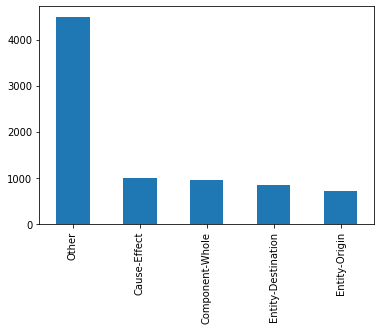

In [ ]:
pf[0].value_counts().plot(kind='bar') 

# **MODEL IMPLEMENTATION**

In [ ]:
#tokenizing the sentences into numbers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
n_most_common_words = 26000 # vocabulary size
max_len = 100
# Initialization
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;=?@[]^_`{|}~', lower=True)
# Fit and transformation
tokenizer.fit_on_texts(pf['Sentences'].values)
sequences = tokenizer.texts_to_sequences(pf['Sentences'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# Padding
X = pad_sequences(sequences, maxlen=max_len) 

Found 25401 unique tokens.


In [ ]:
#mapping the semantic relations to numbers

pf[0]=pf[0].map({'Other':0,'Cause-Effect':1,'Component-Whole':2,'Entity-Destination':3,'Entity-Origin':4})
pf

,0,Sentences
0,2,The system as described above has its greatest...
1,0,The <e1>child</e1> was carefully wrapped and b...
2,0,The <e1>author</e1> of a keygen uses a <e2>dis...
3,0,A misty <e1>ridge</e1> uprises from the <e2>su...
4,0,The <e1>student</e1> <e2>association</e2> is t...
...,...,...
7995,0,When the <e1>notice</e1> is sent by <e2>fax</e...
7996,4,The <e1>herbicide</e1> is derived from a natur...
7997,3,"To test this, we placed a kitchen <e1>match</e..."
7998,0,The farmers and city officials in the region h...


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
import numpy as np
# converting the semantic relation to an array

labels = pf[0]
labels = np.array(labels)

#label_encoder = LabelEncoder()
#vec = label_encoder.fit_transform(labels)

labels = to_categorical(labels, num_classes=5)

# splitting the test train data with 0.2 test size

X_train, X_test, y_train, y_test = train_test_split(X ,labels, test_size=0.20, random_state=42)

In [ ]:
y_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#setting up the model

embedding_size = 300
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(n_most_common_words, embedding_size, input_length=X.shape[1]))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.7, recurrent_dropout=0.7)))
model.add(tf.keras.layers.Dense(labels.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          7800000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              439296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 5)                 1285      
                                                                 
Total params: 8,240,581
Trainable params: 8,240,581
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#fitting the model

model.fit(X_train, y_train, epochs=12, batch_size=128, validation_split=0.2)


Epoch 1/12
40/40 [==============================] - 83s 2s/step - loss: 1.2925 - acc: 0.5604 - val_loss: 1.2165 - val_acc: 0.5594
Epoch 2/12
40/40 [==============================] - 78s 2s/step - loss: 1.0616 - acc: 0.6137 - val_loss: 0.9950 - val_acc: 0.6289
Epoch 3/12
40/40 [==============================] - 78s 2s/step - loss: 0.7274 - acc: 0.7332 - val_loss: 0.9889 - val_acc: 0.6742
Epoch 4/12
40/40 [==============================] - 78s 2s/step - loss: 0.4192 - acc: 0.8635 - val_loss: 0.9396 - val_acc: 0.6953
Epoch 5/12
40/40 [==============================] - 78s 2s/step - loss: 0.2376 - acc: 0.9293 - val_loss: 0.9491 - val_acc: 0.7156
Epoch 6/12
40/40 [==============================] - 79s 2s/step - loss: 0.1302 - acc: 0.9631 - val_loss: 1.1914 - val_acc: 0.7086
Epoch 7/12
40/40 [==============================] - 78s 2s/step - loss: 0.0737 - acc: 0.9793 - val_loss: 1.2115 - val_acc: 0.7102
Epoch 8/12
40/40 [==============================] - 79s 2s/step - loss: 0.0477 - acc: 0.98

In [ ]:
#predicting on X_test/validation set

prediction_probas = model.predict(X_test) 
predictions = np.argmax(prediction_probas, axis=1)
y_test = np.argmax(y_test,axis=1)


In [ ]:
#evaluavating metrics for validation set

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predictions)) #from sklearn.metrics
print(classification_report(y_test, predictions, digits=3))


array([[767,  27,  75,  15,  26],
       [ 32, 155,   5,   0,   7],
       [ 99,   8,  85,   1,   4],
       [ 50,   0,   1, 103,   4],
       [ 48,   8,  13,   1,  66]])
              precision    recall  f1-score   support

           0      0.770     0.843     0.805       910
           1      0.783     0.779     0.781       199
           2      0.475     0.431     0.452       197
           3      0.858     0.652     0.741       158
           4      0.617     0.485     0.543       136

    accuracy                          0.735      1600
   macro avg      0.701     0.638     0.664      1600
weighted avg      0.731     0.735     0.730      1600



In [ ]:
#validation accuracy

acc = accuracy_score(y_test,predictions)
acc

0.735

In [ ]:
# importing the test data set

with open(baseurl+'/SemEval2010_task8_testing/TEST_FILE.txt') as f:
  list_3 = list(f)

In [ ]:
#preprocessing the test set similar to train set

df1 = pd.DataFrame (list_3, columns = ['Sentence'])
df1=df1['Sentence'].str.split('"',expand=True)
df1['Sentence'] = df1[1]
df1 = pd.DataFrame(df1['Sentence'])
# df1['Sentence']=df1['Sentence'].str.replace("<e1>"," ").str.strip()
# df1['Sentence']=df1['Sentence'].str.replace("</e1>"," ").str.strip()
# df1['Sentence']=df1['Sentence'].str.replace("</e2>"," ").str.strip()
# df1['Sentence']=df1['Sentence'].str.replace("<e2>"," ").str.strip()
df1


,Sentence
0,The most common <e1>audits</e1> were about <e2...
1,The <e1>company</e1> fabricates plastic <e2>ch...
2,The school <e1>master</e1> teaches the lesson ...
3,The suspect dumped the dead <e1>body</e1> into...
4,Avian <e1>influenza</e1> is an infectious dise...
...,...
2712,"After seating all the idols, which itself take..."
2713,The minister attributed the slow production of...
2714,The <e1>umbrella</e1> <e2>frame</e2> is provid...
2715,Manos: The Hands of Fate is a low-budget horro...


In [ ]:
#tokenizing the training set into numbers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
n_most_common_words = 20000 # vocabulary size
max_len = 100
# Initialization
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;=?@[]^_`{|}~', lower=True)
# Fit and transformation
tokenizer.fit_on_texts(df1['Sentence'].values)
sequences = tokenizer.texts_to_sequences(df1['Sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# Padding
X1 = pad_sequences(sequences, maxlen=max_len) 

Found 12774 unique tokens.


In [ ]:
#predicting on test set

preds = model.predict(X1)

# extracting semantic mapping relation into an array
preds = np.argmax(preds, axis=1)



In [ ]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#importing labels for test data to calculate metrics

with open(baseurl+'/SemEval2010_task8_testing_keys/TEST_FILE_KEY.TXT') as f:
  list_4 = list(f)

In [ ]:
pf1 = pd.DataFrame (list_4, columns = ['Semants'])

In [ ]:
#preprocessing it the similar way as done for training set

p=pf1['Semants'].str.split('\t',expand=True)
p = p[1]
p = p.str.strip()
pf2 = pd.DataFrame(p)
pf2[1].unique()


array(['Message-Topic', 'Product-Producer', 'Instrument-Agency',
       'Entity-Destination', 'Cause-Effect', 'Component-Whole',
       'Member-Collection', 'Other', 'Entity-Origin', 'Content-Container'],
      dtype=object)

In [ ]:
pf2=pf2[1].replace(to_replace=['Message-Topic', 'Product-Producer', 'Instrument-Agency',
       'Member-Collection', 'Other', 'Content-Container'],value='Other')

In [ ]:
#mapping semantic relations

pf2 = pd.DataFrame(pf2)
pf2[1]=pf2[1].map({'Other':0,'Cause-Effect':1,'Component-Whole':2,'Entity-Destination':3,'Entity-Origin':4})

In [ ]:
#from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
import numpy as np
labels1 = pf2[1]
labels1 = np.array(labels1)
true = labels1
true

array([0, 0, 0, ..., 2, 0, 3])

In [ ]:
#metrics for test data set

print(confusion_matrix(true, preds)) #from sklearn.metrics
print(classification_report(true, preds, digits=3))


array([[1135,  103,  174,   34,   81],
       [ 146,  148,   24,    4,    6],
       [ 209,   30,   52,    6,   15],
       [ 230,    5,   12,   36,    9],
       [ 206,   10,   24,    2,   16]])
              precision    recall  f1-score   support

           0      0.589     0.743     0.657      1527
           1      0.500     0.451     0.474       328
           2      0.182     0.167     0.174       312
           3      0.439     0.123     0.193       292
           4      0.126     0.062     0.083       258

    accuracy                          0.510      2717
   macro avg      0.367     0.309     0.316      2717
weighted avg      0.472     0.510     0.475      2717



In [ ]:
#test set accuracy

accu = accuracy_score(true,preds)
accu

0.5104895104895105

## **ERROR ANALYSIS ON 50 RANDOM TEST SENTENCES**

In [ ]:
with open(baseurl+'/SemEval2010_task8_testing_keys/TEST_FILE_KEY.TXT') as f: # Selecting 50 sentences 
  list_5 = list(f)[:100:2]

In [ ]:
with open(baseurl+'/SemEval2010_task8_testing_keys/TEST_FILE_CLEAN.TXT') as f: # Selecting their labels
  list_6 = list(f)[:100:2]

In [ ]:
pf_1=pd.DataFrame (list_5, columns = ['Semants'])
p=pf_1['Semants'].str.split('\t',expand=True)
p = p[1]
p = p.str.strip()
pf_2 = pd.DataFrame(p)


In [ ]:
pf_2[1] = pf_2[1].replace(to_replace=['Instrument-Agency',
       'Member-Collection', 'Content-Container',
       'Message-Topic', 'Product-Producer',
       'Member-Collection',
       'Message-Topic', 'Product-Producer'
       , 'Content-Container',
       'Instrument-Agency'],value='Other')

In [ ]:
pf_2['Mapped']=pf_2[1].map({'Other':0,'Cause-Effect':1,'Component-Whole':2,'Entity-Destination':3,'Entity-Origin':4})
labels_2=pf_2['Mapped']
labels_2=np.array(labels_2)


In [ ]:
pf

,0,Sentences
0,2,The system as described above has its greatest...
1,0,The <e1>child</e1> was carefully wrapped and b...
2,0,The <e1>author</e1> of a keygen uses a <e2>dis...
3,0,A misty <e1>ridge</e1> uprises from the <e2>su...
4,0,The <e1>student</e1> <e2>association</e2> is t...
...,...,...
7995,0,When the <e1>notice</e1> is sent by <e2>fax</e...
7996,4,The <e1>herbicide</e1> is derived from a natur...
7997,3,"To test this, we placed a kitchen <e1>match</e..."
7998,0,The farmers and city officials in the region h...


In [ ]:
df1 = pd.DataFrame (list_6, columns = ['Sentence'])
df1=df1['Sentence'].str.split('"',expand=True)
df1['Sentence'] = df1[1]
df1 = pd.DataFrame(df1['Sentence'])
# df1['Sentence']=df1['Sentence'].str.replace("<e1>"," ").str.strip()
# df1['Sentence']=df1['Sentence'].str.replace("</e1>"," ").str.strip()
# df1['Sentence']=df1['Sentence'].str.replace("</e2>"," ").str.strip()
# df1['Sentence']=df1['Sentence'].str.replace("<e2>"," ").str.strip()
df1

,Sentence
0,The most common <e1>audits</e1> were about <e2...
1,The school <e1>master</e1> teaches the lesson ...
2,Avian <e1>influenza</e1> is an infectious dise...
3,A child is told a <e1>lie</e1> for several yea...
4,The disgusting scene was retaliation against h...
5,Ten million quake <e1>survivors</e1> moved int...
6,NASA Kepler mission sends <e1>names</e1> into ...
7,As I was contemplating if I had a favorite in ...
8,The famous <e1>actress</e1> arrived at the <e2...
9,Beneath this invocation there is a <e1>zoo</e1...


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
n_most_common_words = 20000 # vocabulary size
max_len = 100
# Initialization
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;=?@[]^_`{|}~', lower=True)
# Fit and transformation
tokenizer.fit_on_texts(df1['Sentence'].values)
sequences = tokenizer.texts_to_sequences(df1['Sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# Padding
X1 = pad_sequences(sequences, maxlen=max_len) 

Found 492 unique tokens.


In [ ]:
preds_2 = model.predict(X1)
preds_2 = np.argmax(preds_2, axis=1)
preds_2

array([2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 3, 0, 0, 0])

In [ ]:
df1['Predicted']=preds_2

In [ ]:
df1['Predicted']=df1['Predicted'].map({0:'Other',1:'Cause-Effect',2:'Component-Whole',3:'Entity-Destination',4:'Entity-Origin'})

In [ ]:
df1['Actual']=pf_2[1]


# **RESULTS ON 50 RANDOM SENTENCES**

In [ ]:
df1            # Predicted vs actual table of 50 sentences

,Sentence,Predicted,Actual
0,The most common <e1>audits</e1> were about <e2...,Component-Whole,Other
1,The school <e1>master</e1> teaches the lesson ...,Component-Whole,Other
2,Avian <e1>influenza</e1> is an infectious dise...,Other,Cause-Effect
3,A child is told a <e1>lie</e1> for several yea...,Other,Other
4,The disgusting scene was retaliation against h...,Cause-Effect,Component-Whole
5,Ten million quake <e1>survivors</e1> moved int...,Other,Entity-Destination
6,NASA Kepler mission sends <e1>names</e1> into ...,Other,Entity-Destination
7,As I was contemplating if I had a favorite in ...,Other,Entity-Origin
8,The famous <e1>actress</e1> arrived at the <e2...,Component-Whole,Entity-Destination
9,Beneath this invocation there is a <e1>zoo</e1...,Other,Other


In [ ]:
print(confusion_matrix(labels_2, preds_2)) #from sklearn.metrics
print(classification_report(labels_2, preds_2, digits=3))


array([[18,  3,  3,  0,  0],
       [ 5,  3,  0,  0,  0],
       [ 2,  1,  1,  1,  0],
       [ 6,  0,  1,  0,  0],
       [ 4,  0,  1,  0,  1]])
              precision    recall  f1-score   support

           0      0.514     0.750     0.610        24
           1      0.429     0.375     0.400         8
           2      0.167     0.200     0.182         5
           3      0.000     0.000     0.000         7
           4      1.000     0.167     0.286         6

    accuracy                          0.460        50
   macro avg      0.422     0.298     0.296        50
weighted avg      0.452     0.460     0.409        50



In [ ]:
#accuracy on 50 sentences

acc1 = accuracy_score(labels_2,preds_2)
acc1

0.46

We could keep going and increase the number of epochs (reasonably to avoid overfitting, a quick test showed that the validation loss stops increasing after 12 epochs) or fine-tune the hyperparameters, but actually, there is one other thing that may prevent the results we’re looking for.
This dataset is rather small to train a neural network (8000 sentences for training). This is a common issue in NLP — hard tasks’ annotations are not obvious and thus are very time-consuming.


A better metric for analysis would be precision rather than accuracy.
The more accurate these Precisions, the better the model.
The overrepresentation of the class No relation introduces a bias, enhancing the Precision of the other classes. In other terms, it means that if the model predicts a relation for an entity pair, there are good chances that this relation is correct. In the best case, the predicted output is the right class, and in the worst, it is No relation so the model is not misleading us with a wrong relation.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.



In [ ]:
#precision score for each class
from sklearn.metrics import precision_score
prec1 = precision_score(labels_2,preds_2, average=None)
prec1

array([0.51428571, 0.42857143, 0.16666667, 0.        , 1.        ])